In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\gajen\OneDrive\Desktop\Dataset .csv")

In [5]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
# Level-3 Task-1 Calculate the average length of reviews and explore if there is a relationship between review length and rating.
The data set cotains information like restaurants, including their names, location, ratings, cuisines, and more. 
However, it does not appear to include actual review texts, which are necessary to calculate review length and explore the relationship between review length and rating.

In [7]:
from collections import Counter

# Step 1: Extract and clean the 'Rating text' column
rating_text_col = data['Rating text'].dropna().str.lower().str.strip()
print(rating_text_col)

0       excellent
1       excellent
2       very good
3       excellent
4       excellent
          ...    
9546    very good
9547    very good
9548         good
9549    very good
9550    very good
Name: Rating text, Length: 9551, dtype: object


In [9]:
keywords_count_of_each_category = Counter(rating_text_col)
print(keywords_count_of_each_category)

Counter({'average': 3737, 'not rated': 2148, 'good': 2100, 'very good': 1079, 'excellent': 301, 'poor': 186})


In [11]:
positive_keywords = ['excellent', 'very good', 'good']
negative_keywords = ['poor']
positive_ratings = {k: keyword_counts[k] for k in positive_keywords if k in keyword_counts}
highest_positive = max(positive_ratings.items(), key=lambda x: x[1])
negative_ratings = {k: keyword_counts[k] for k in negative_keywords if k in keyword_counts}
highest_negative = max(negative_ratings.items(), key=lambda x: x[1])
print(f"Rating: {highest_positive[0]}, Count: {highest_positive[1]}")
print(f"Rating: {highest_negative[0]}, Count: {highest_negative[1]}")

Rating: good, Count: 2100
Rating: poor, Count: 186


In [15]:
# Convert 'Votes' column to numeric (in case of any issues)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
remove_rows_of_votes_null_cells= data.dropna(subset=['Votes'])
maximum_votes = remove_rows_of_votes_null_cells['Votes'].max()
minimum_votes = remove_rows_of_votes_null_cells['Votes'].min()
# Restaurants with the highest number of votes
highest_voted = remove_rows_of_votes_null_cells[remove_rows_of_votes_null_cells['Votes'] == maximum_votes][['Restaurant Name', 'City', 'Votes']]
# Restaurants with the lowest number of votes
lowest_voted =remove_rows_of_votes_null_cells[remove_rows_of_votes_null_cells['Votes'] == minimum_votes][['Restaurant Name', 'City', 'Votes']]

print("Highest Voted Restaurant(s):")
print(highest_voted.to_string(index=False))

print("\nLowest Voted Restaurant(s):")
print(lowest_voted.to_string(index=False))


Highest Voted Restaurant(s):
Restaurant Name      City  Votes
           Toit Bangalore  10934

Lowest Voted Restaurant(s):
                            Restaurant Name       City  Votes
                           Cantinho da Gula S��o Paulo      0
                              The Chaiwalas  Faridabad      0
                         Fusion Food Corner  Faridabad      0
                              Punjabi Rasoi  Faridabad      0
                              Baskin Robbin  Faridabad      0
                                     Angaar  Faridabad      0
                                      TcozY  Faridabad      0
                              The Retriever  Faridabad      0
                             Chill 'N Grill  Faridabad      0
                         Punjabi Restaurant  Faridabad      0
                     Standard Chicken Point  Faridabad      0
                         The Grillz & Gravy  Faridabad      0
                                Little Cafe  Faridabad      0
        

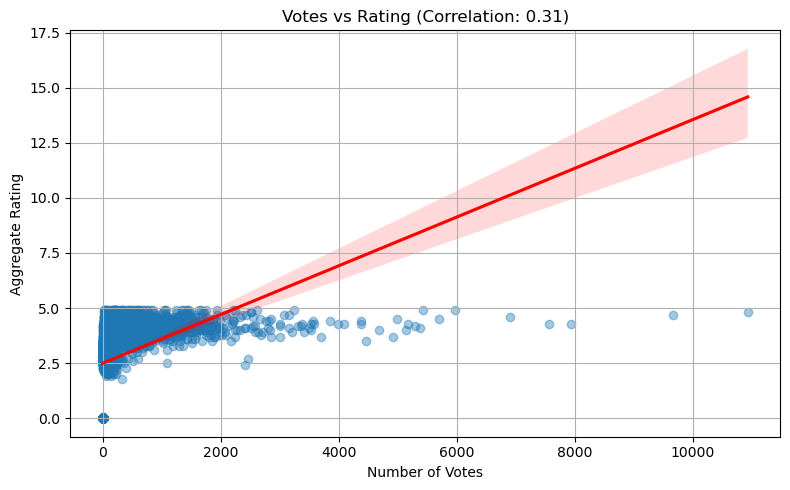

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert columns to numeric
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')
# Drop rows with missing values
data = data.dropna(subset=['Votes', 'Aggregate rating'])
# Calculate correlation
correlation = data['Votes'].corr(data['Aggregate rating'])

# Plot graph
plt.figure(figsize=(8, 5))
sns.regplot(x='Votes', y='Aggregate rating', data=data,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title(f"Votes vs Rating (Correlation: {correlation:.2f})")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

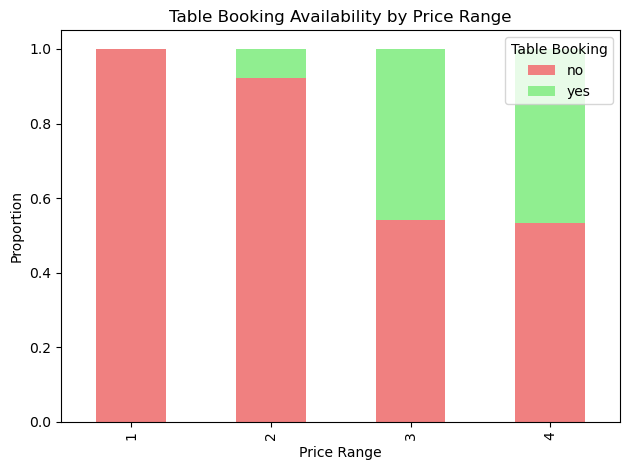

<Figure size 1000x400 with 0 Axes>

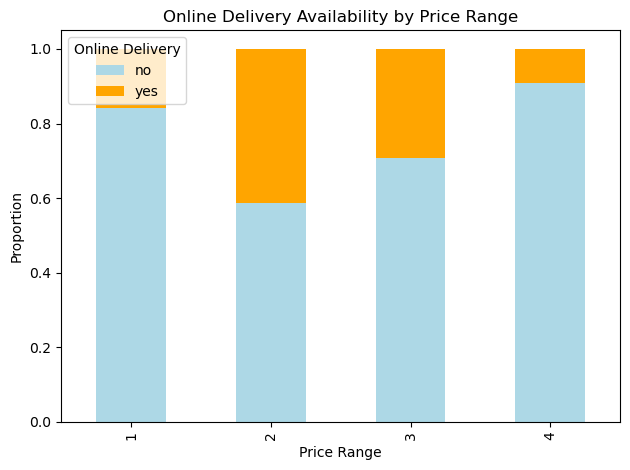

(Has Table booking        no       yes
 Price range                          
 1                  0.999775  0.000225
 2                  0.923225  0.076775
 3                  0.542614  0.457386
 4                  0.532423  0.467577,
 Has Online delivery        no       yes
 Price range                            
 1                    0.842259  0.157741
 2                    0.586894  0.413106
 3                    0.708097  0.291903
 4                    0.909556  0.090444)

In [24]:
# Select relevant columns
data_subset_cols = data[['Price range', 'Has Table booking', 'Has Online delivery']].copy()

# Clean the data: normalize strings
data_subset_cols['Has Table booking'] = data_subset_cols['Has Table booking'].str.strip().str.lower()
data_subset_cols['Has Online delivery'] = data_subset_cols['Has Online delivery'].str.strip().str.lower()

# Group by price range and calculate proportions
price_vs_table = data_subset_cols.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack()
price_vs_delivery = data_subset_cols.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()

# Plot table booking vs price range
plt.figure(figsize=(10, 4))
price_vs_table.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title("Table Booking Availability by Price Range")
plt.ylabel("Proportion")
plt.xlabel("Price Range")
plt.legend(title="Table Booking")
plt.tight_layout()
plt.show()

# Plot online delivery vs price range
plt.figure(figsize=(10, 4))
price_vs_delivery.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Proportion")
plt.xlabel("Price Range")
plt.legend(title="Online Delivery")
plt.tight_layout()
plt.show()

# Return data used for visual insights
price_vs_table, price_vs_delivery


In [26]:

# Clean boolean text values
data['Has Table booking'] = data['Has Table booking'].str.strip().str.lower()
data['Has Online delivery'] = data['Has Online delivery'].str.strip().str.lower()

# Group by price range and count proportions
table_booking_ratio = data.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0)
online_delivery_ratio = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0)

# Display proportion of 'yes' for each service
print("Table Booking Proportion by Price Range:")
print(table_booking_ratio['yes'])

print("\nOnline Delivery Proportion by Price Range:")
print(online_delivery_ratio['yes'])


Table Booking Proportion by Price Range:
Price range
1    0.000225
2    0.076775
3    0.457386
4    0.467577
Name: yes, dtype: float64

Online Delivery Proportion by Price Range:
Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: yes, dtype: float64
